In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./datasets/heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Univariate analysis

<Axes: xlabel='Age', ylabel='Count'>

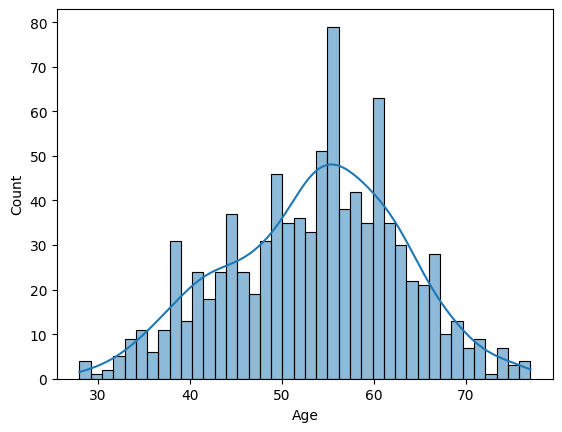

In [20]:
sns.histplot(data=df,x='Age',bins=40,kde=True)
# unimodal and left skewed distribution
# data clustered between 40 to 65
# most values or highest peak is between 54 and 56

In [11]:
df['Age'].skew() # left skewed

-0.19593302867569365

0.1798393100516288

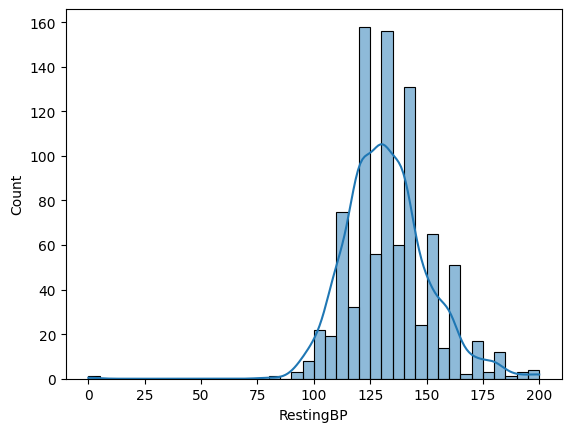

In [29]:
sns.histplot(data=df,x='RestingBP',bins=40,kde=True)
df['RestingBP'].skew()
# unimodal distribution
# peak is higher than normal distribution
# outliers at low values of RestingBP
# mostly data is clustered between 115 to 140
# peak is very low in 125 to 130 bin as compared to the adjacent bins which can be beacuse of less data

-0.6100864307268192

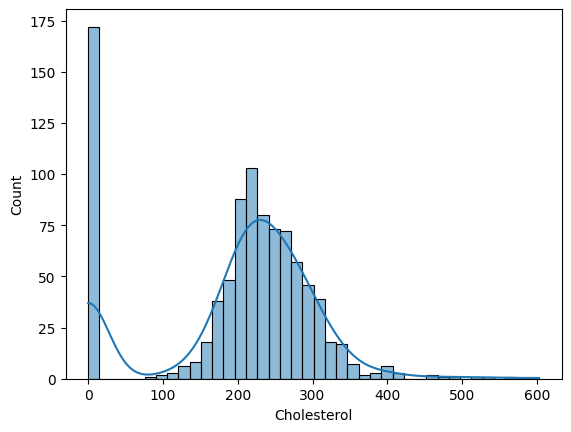

In [43]:
sns.histplot(data=df,x='Cholesterol',bins=40,kde=True)
df['Cholesterol'].skew()
# bimodal distribution but it is due to outliers with 0 Cholesterol
# if outliers are neglected the distribution is unimodel and peak is higher than normal distribution
# and data is right skewed due to outliers at right

In [40]:
(df['Cholesterol'].value_counts()[0]/df.shape[0])*100
# 18% people have 0 cholestrol which are outliers

18.736383442265794

-0.14435941846180994

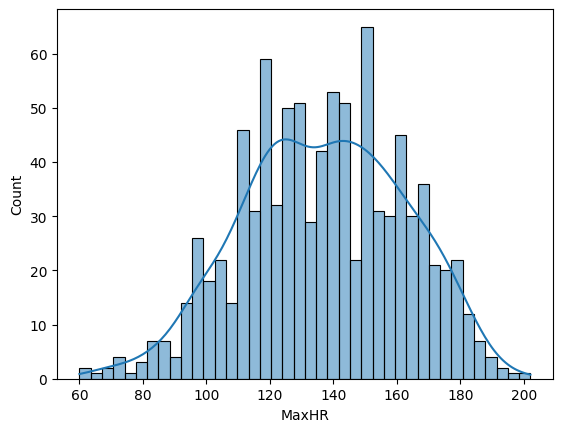

In [48]:
sns.histplot(data=df,x='MaxHR',bins=40,kde=True)
df['MaxHR'].skew()
# bimodal distribution with frequent hgih and low peaks between 110 to 170
# data si spreaded and slighlt left skewed

In [50]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: ylabel='count'>

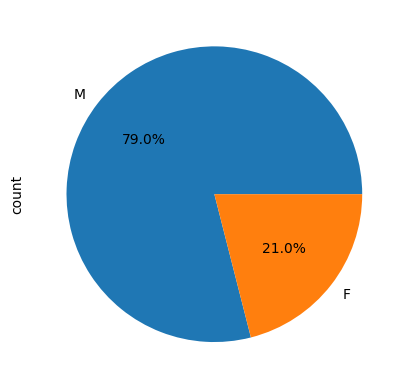

In [51]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# 80 20 ratio of male and female so data is slightly imbalanced based on gender

In [54]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: ylabel='count'>

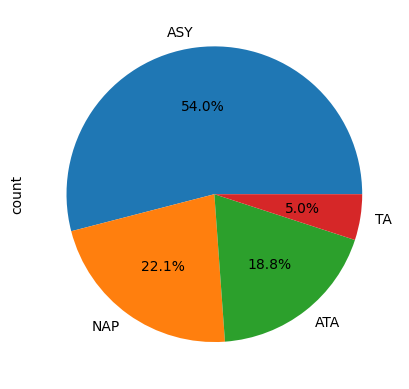

In [55]:
df['ChestPainType'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# 50% patients have ASy and only 5% patients have TA type chest pain

In [60]:
df['FastingBS'].value_counts()
# most people donot have have sugar

FastingBS
0    704
1    214
Name: count, dtype: int64

In [63]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: ylabel='count'>

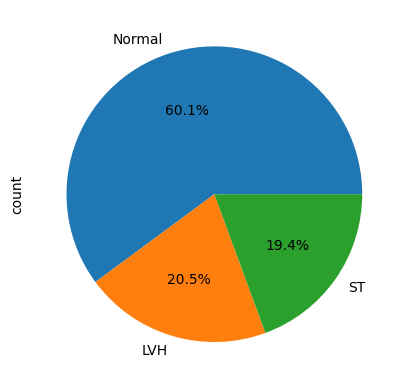

In [64]:
df['RestingECG'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# more than half patients have nnormal ecg report

<Axes: ylabel='count'>

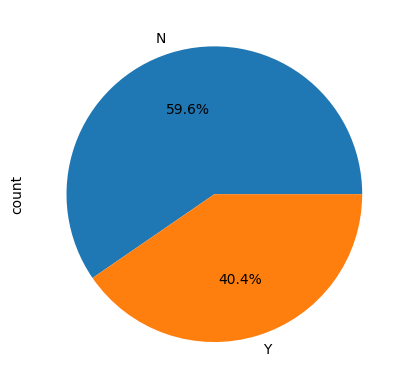

In [66]:
df['ExerciseAngina'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# 60 40 ratio between patients having pain in chest while exercise

<Axes: ylabel='count'>

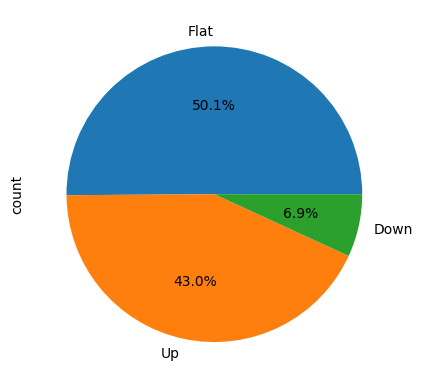

In [68]:
df['ST_Slope'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# most people have flat ST slope

<Axes: ylabel='count'>

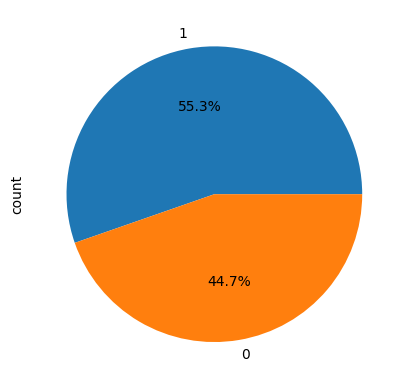

In [11]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%0.1f%%')
# heart disease of people is almost balanced

# Bivariate analysis

<Axes: xlabel='Age', ylabel='Density'>

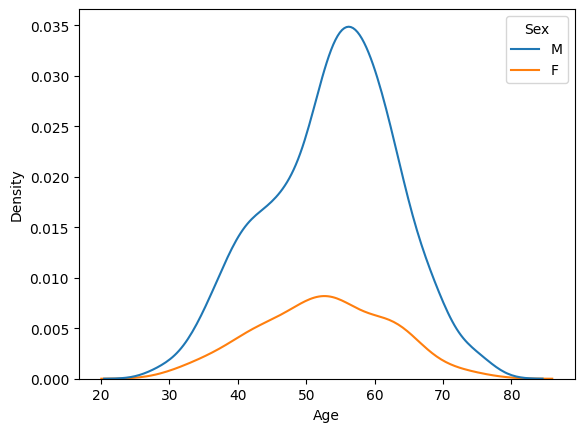

In [6]:
sns.kdeplot(data=df,x='Age',hue='Sex')
# same distribution of both male and female
# spread is higher of females because of less data
# data is normally distributed for females

<Axes: xlabel='Sex', ylabel='Age'>

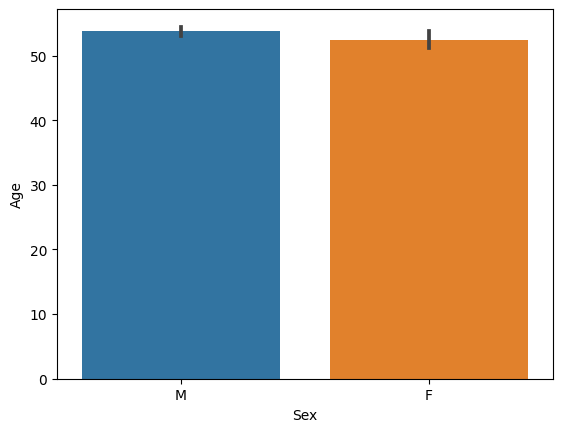

In [16]:
sns.barplot(data=df,x='Sex',y='Age',estimator='mean')
# mean of both male and female is same

<Axes: xlabel='HeartDisease', ylabel='Age'>

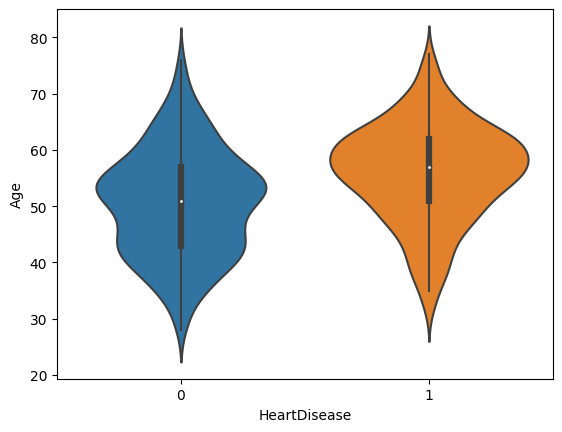

In [33]:
sns.violinplot(data=df,y='Age',x='HeartDisease')
# bimodal distribution of pateints with no heart disease
# median and quartiles of people with heart disease is higher
# minmum of people with no disease is less than minimum of people with disease and 
# higher is also less than higher of people with disease


In [42]:
pd.crosstab(index=df['HeartDisease'],columns=df['Sex'],normalize='columns')*100
# males tend to die more often than females

Sex,F,M
HeartDisease,,
0,74.093264,36.827586
1,25.906736,63.172414


In [41]:
pd.crosstab(index=df['HeartDisease'],columns=df['ChestPainType'],normalize='columns')*100
# most people who die have chest pain type ASY
# and people having ATA chest pain have low chances of death
# other types have almost equal chances as compared to others

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,20.967742,86.127168,64.53202,56.521739
1,79.032258,13.872832,35.46798,43.478261


In [44]:
pd.crosstab(index=df['HeartDisease'],columns=df['FastingBS'],normalize='columns')*100
# people having sugar die more often and those who donot have sugar have equal chance of death

FastingBS,0,1
HeartDisease,,
0,51.988636,20.560748
1,48.011364,79.439252


In [48]:
pd.crosstab(index=df['HeartDisease'],columns=df['ExerciseAngina'],normalize='columns')*100
# people having chest pain while exercise die more often

ExerciseAngina,N,Y
HeartDisease,,
0,64.899452,14.824798
1,35.100548,85.175202


In [50]:
pd.crosstab(index=df['HeartDisease'],columns=df['ST_Slope'],normalize='columns')*100
# people with down and flat ST slope on ecg dies more than people having up ST slope

ST_Slope,Down,Flat,Up
HeartDisease,,,
0,22.222222,17.173913,80.253165
1,77.777778,82.826087,19.746835


In [71]:
pd.crosstab(index=df['HeartDisease'],columns=df['RestingECG'],normalize='columns')*100
# no noticable difference

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,43.617021,48.369565,34.269663
1,56.382979,51.630435,65.730337


In [178]:
pd.crosstab(df['Sex'],df['ExerciseAngina'],normalize='index')*100
# males have equal chances of having exercise angina wherease less females have exercise angina

ExerciseAngina,N,Y
Sex,,
F,77.720207,22.279793
M,54.758621,45.241379


<Axes: >

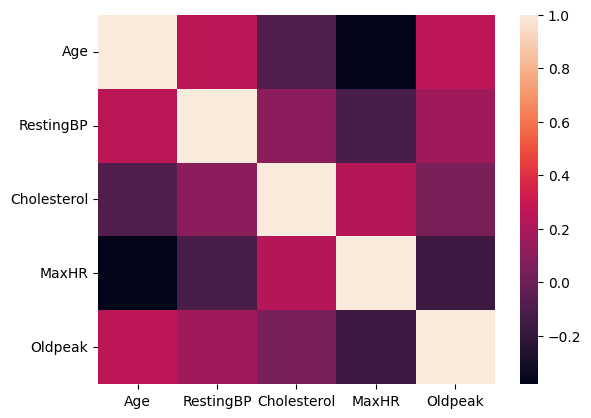

In [61]:
sns.heatmap(df.iloc[:,[0,3,4,7,9]].corr())
# no significant correlation between numerical columns

<Axes: xlabel='RestingBP', ylabel='Density'>

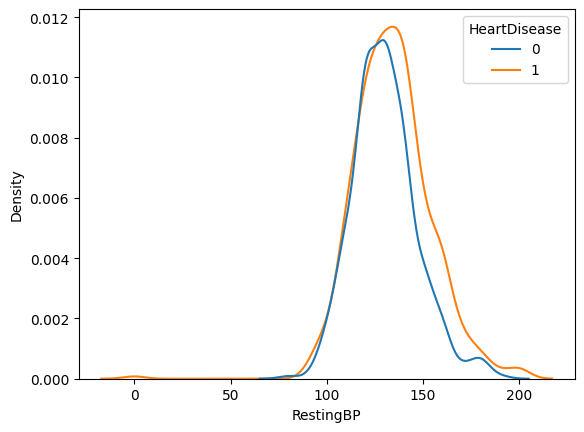

In [5]:
sns.kdeplot(data=df,x='RestingBP',hue='HeartDisease')
# resting bp of people having disease is shifted towards right from the trail
# leading of graph is overlaped
# peak of people having heart disease is high

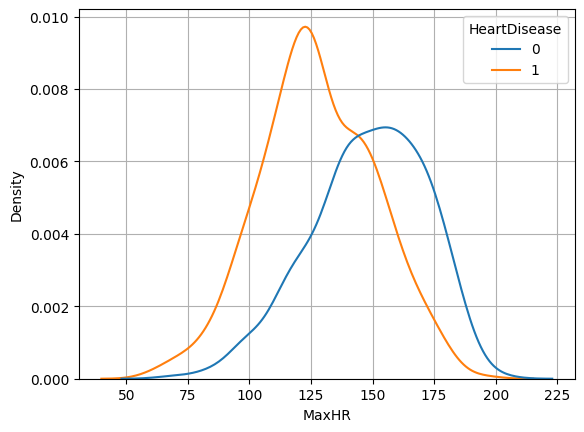

In [8]:
sns.kdeplot(data=df,x='MaxHR',hue='HeartDisease')
plt.grid()
# MaxHR of people having disease is shifted towards left and distribution is bimodal and right skewed
# which show that mean MaxHR od people with no disease is higher
# where as distribution of people who donot have disease is unimodal left skewed
# data of people with no disease is more spreaded at peak but peak is low as compared to people with disease
# peak of people with disease lies between 120 to 125 where as peak of people with no disease lies between 140 to 160
# data of people with no heart disease is almost normally distributed

<Axes: xlabel='Cholesterol', ylabel='Density'>

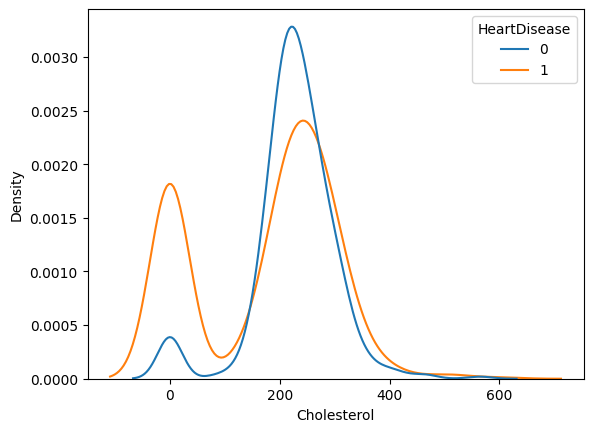

In [10]:
sns.kdeplot(data=df,x='Cholesterol',hue='HeartDisease')
# bimodal distribution which maybe because of alot of outliers at 0 cholestrol,overlapping with a high and a low peak 
# trailing of both graphs is too long which shows there maybe some outliers at hgih values of cholestrol
# peak of people with heart disease is much low which maybe due to too many outliers of people having 0 cholestrol

# Multivariate analysis

<Axes: xlabel='ChestPainType', ylabel='RestingBP'>

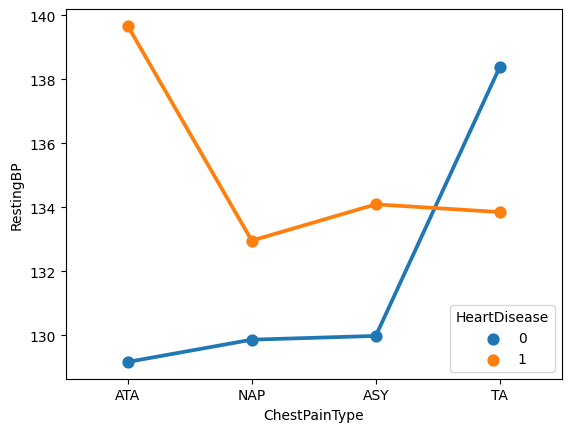

In [27]:
sns.pointplot(data=df,x='ChestPainType',y='RestingBP',hue='HeartDisease',estimator='mean',errorbar=None)
# people with disease having ATA chest pain have highest RestingBP
# people with no disease having TA chest pain have highest RestingBP
# RestingBP of people with no heart disease of ChestPainType other than 
# TA is low as compared to RestingBP of people with disease

<Axes: xlabel='ChestPainType', ylabel='Cholesterol'>

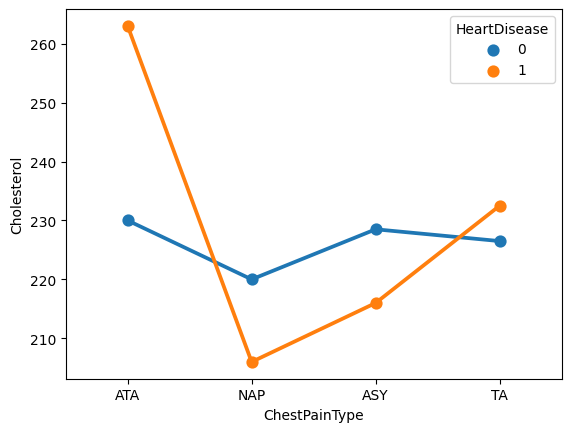

In [140]:
sns.pointplot(data=df,x='ChestPainType',y='Cholesterol',hue='HeartDisease',estimator='median',errorbar=None)
# taking median because we have outliers with 0 cholesterol
# people with ATA chest type with high cholesterol level tend to have heart disease
# people with NAP chest type and low choleterol tend to have heart disease

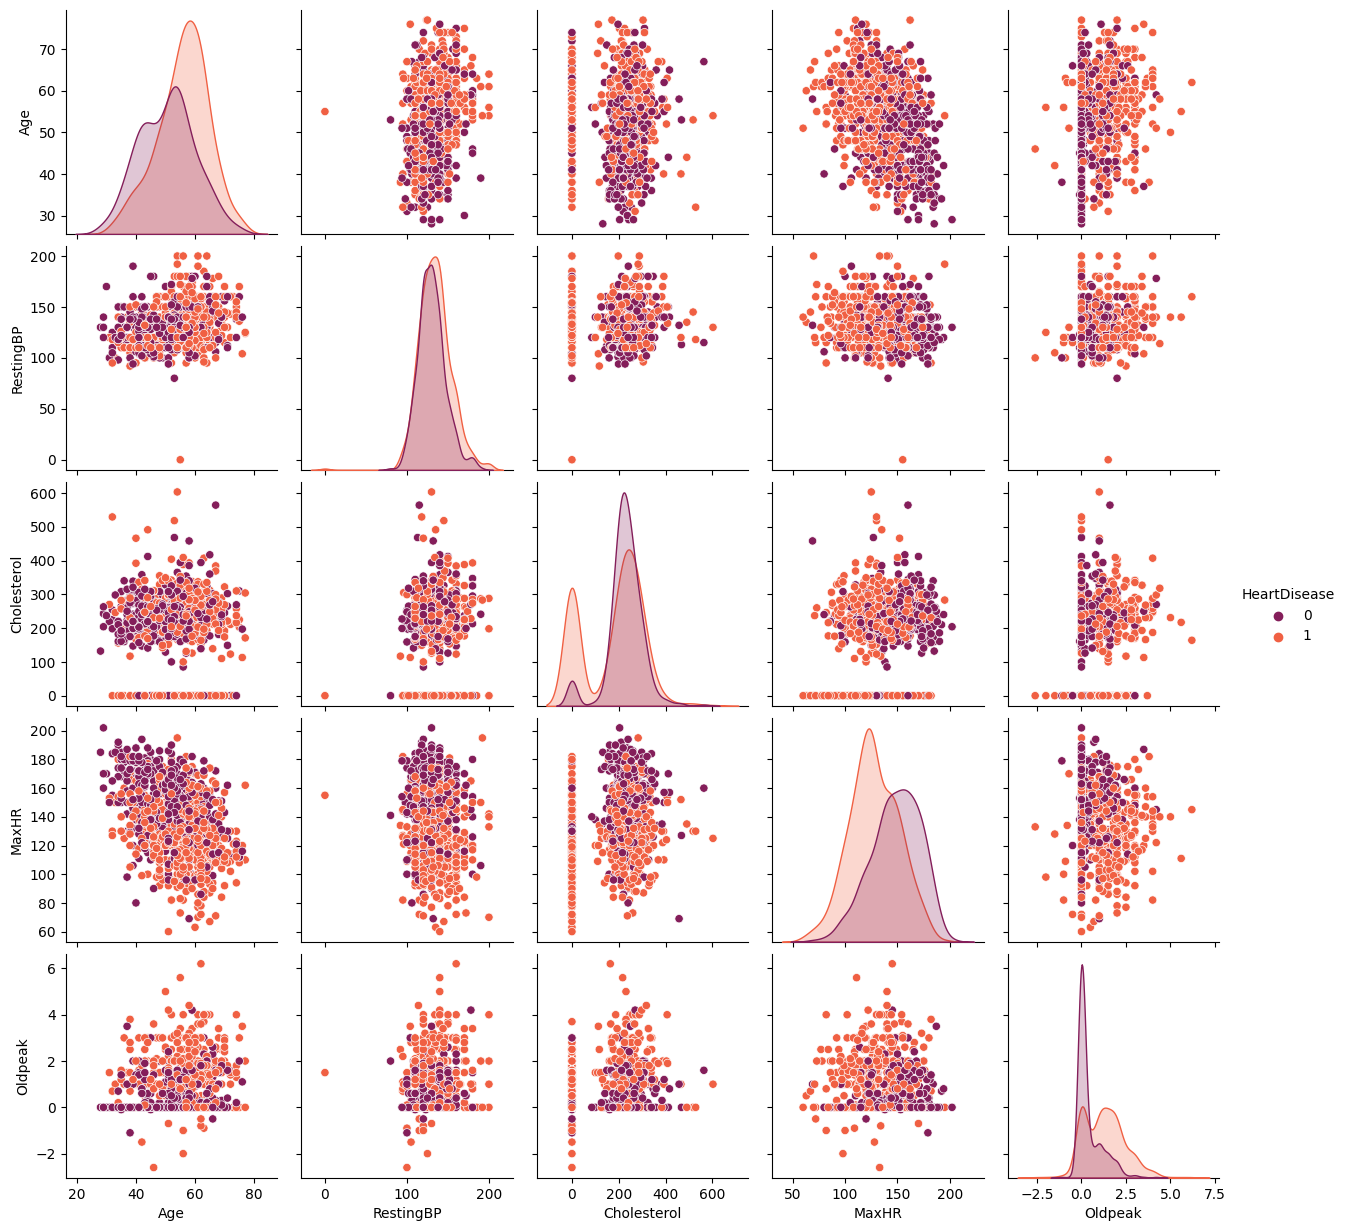

In [70]:
sns.pairplot(data=df,vars=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'],hue='HeartDisease',palette='rocket')

# MaxHR-Age -> people with disease have high age and low MaxHR
# RestingBP-Age -> people with high resting BP have heart disease with balanced age
# no toher noticable insights


In [203]:
df.pivot_table(index='ST_Slope',columns='HeartDisease',values=['Cholesterol','RestingBP'],aggfunc='median')
# people who have heart disease mostly have low cholesterol,low restingBP 
# except for flat ST_Slope people with high RestingBP tend to have heart disease

Cholesterol        RestingBP     
HeartDisease           0      1         0    1
ST_Slope                                      
Down               236.5  200.0       130  125
Flat               229.0  220.0       130  135
Up                 226.0  192.0       130  127

<Axes: xlabel='None-RestingECG', ylabel='ST_Slope'>

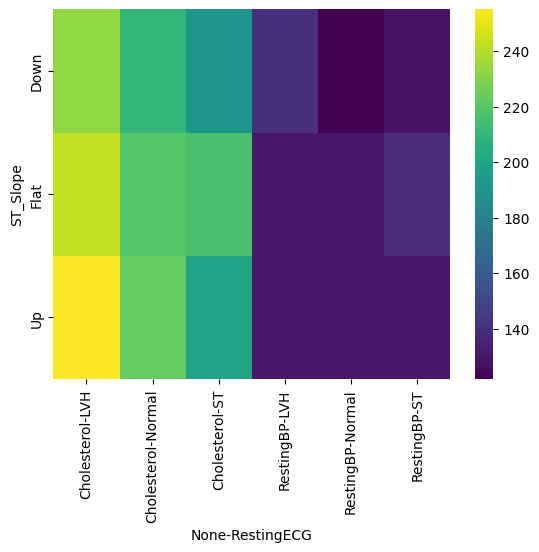

In [150]:
sns.heatmap(df.pivot_table(index='ST_Slope',columns='RestingECG',values=['Cholesterol','RestingBP'],aggfunc='median'),cmap='viridis')
# people with Up ST_Slope and LVH ECG reading have highest cholesterol 
# and people with down ST_Slope and normal ECG reading have lowest resting BP

<Axes: xlabel='HeartDisease-RestingECG', ylabel='ChestPainType'>

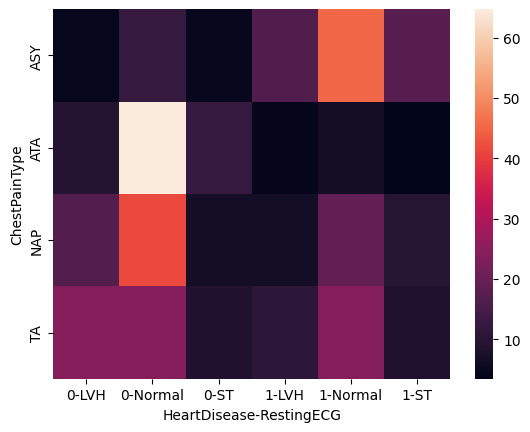

In [196]:
sns.heatmap(pd.crosstab(index=df['ChestPainType'],columns=[df['HeartDisease'],df['RestingECG']],normalize='index')*100)
# ASY -> people having normal ecg are more tend to have heart disease 
# ATA -> people having normal ecg are more tend to not have heart disease
# NAP -> people having normal ecg are more tend to not have heart disease
# TA -> equal distribution

<Axes: xlabel='HeartDisease-ExerciseAngina', ylabel='ChestPainType'>

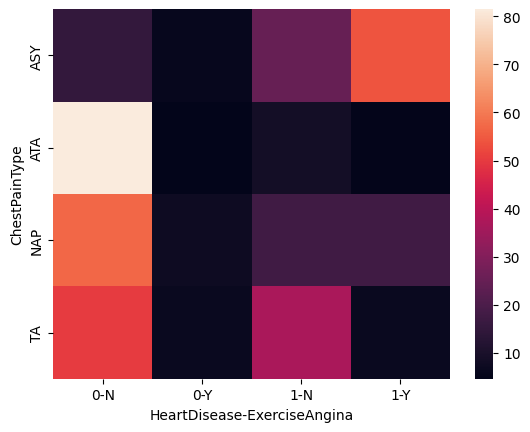

In [201]:
sns.heatmap(pd.crosstab(index=df['ChestPainType'],columns=[df['HeartDisease'],df['ExerciseAngina']],normalize='index')*100)
# in ATA,NAP chest pain type people with no exercise angina have no disease
# ASY chest pain type people with chest pain on exercise tend to have disease
# TA chest pain type people have almost equal chances of having and not having disease on exercise angina

In [198]:
pd.crosstab(df['Sex'],[df['ExerciseAngina'],df['HeartDisease']],normalize='index')*100
# males have higher risk of having heart disease in case of exercise angina as compared to females

ExerciseAngina          N                    Y           
HeartDisease            0          1         0          1
Sex                                                      
F               65.803109  11.917098  8.290155  13.989637
M               31.448276  23.310345  5.379310  39.862069

<Axes: xlabel='RestingECG-HeartDisease', ylabel='ST_Slope'>

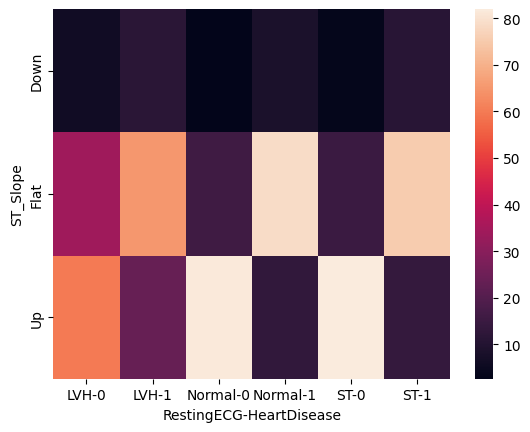

In [190]:
sns.heatmap(pd.crosstab(df['ST_Slope'],[df['RestingECG'],df['HeartDisease']],normalize='columns')*100)
# LVH -> donot have disease=Up , have disease=Flat
# Normal -> donot have disease=Up , have disease=Flat
# ST -> donot have disease=Up , have disease=Flat

<Axes: xlabel='HeartDisease', ylabel='ChestPainType'>

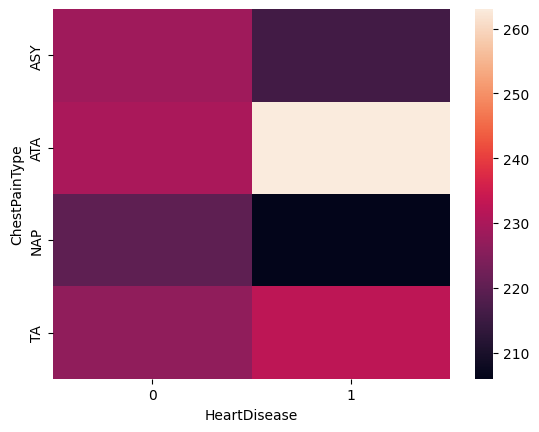

In [195]:
sns.heatmap(df.pivot_table(index='ChestPainType',columns='HeartDisease',values='Cholesterol',aggfunc='median'))
# person with ATA chest type and high choresterol tend to have heart disease
# person with  ATA chest type and low choresterol tend to have heart disease